In [3]:
# Import Library
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.models import *
import os
import random
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

In [5]:
# Read dataset
path = "C:\IngIng\lab\chest_xray"
os.listdir(path)

['test', 'train', 'val']

In [13]:
train_path = []
test_path = []
val_path = []
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/train"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            train_path.append(os.path.join(dir_name, filename))
            
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/test"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            test_path.append(os.path.join(dir_name, filename))
            
for dir_name, _, filenames in os.walk("C:/IngIng/lab/chest_xray/val"):
    for filename in filenames:
        if (filename[-4:] == 'jpeg'):
            val_path.append(os.path.join(dir_name, filename))

In [14]:
train_path

['C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1003233-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1012843-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1014768-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1023731-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1029510-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1031320-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1034239-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1041364-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1044645-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1055663-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1063934-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1064313-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1064313-0002.jpeg',
 'C:/IngIng/lab/chest_xray/train\\NORMAL\\NORMAL-1068231-0001.jpeg',
 'C:/IngIng/lab/chest_xray/train\\

In [15]:
train_image = []
train_label = []
test_image = []
test_label = []
val_image = []
val_label = []
width = 150
height = 150
from tqdm import tqdm
title_dict = {'PNEUMONIA':1, 'NORMAL':0}
for img_path in tqdm(train_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    train_image.append(image)
    train_label.append(title_dict[label])
              
for img_path in tqdm(test_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    test_image.append(image)
    test_label.append(title_dict[label])
              
for img_path in tqdm(val_path):
    label = img_path.split(os.path.sep)[-2]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (width, height))#/255
    val_image.append(image)
    val_label.append(title_dict[label])

100%|██████████| 16/16 [00:00<00:00, 108.75it/s]


In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
train_labels = le.fit_transform(train_label)
train_labels = to_categorical(train_labels)
test_labels = le.fit_transform(test_label)
test_labels = to_categorical(test_labels)
val_labels = le.fit_transform(val_label)
val_labels = to_categorical(val_labels)

In [19]:
print(le.classes_)
print(val_labels[0])

[0 1]
[1. 0.]


In [20]:
train_image = np.array(train_image)
train_labels = np.array(train_labels)

test_image = np.array(test_image)
test_labels = np.array(test_labels)

val_image = np.array(val_image)
val_labels = np.array(val_labels)
train_image.shape, train_labels.shape

((5232, 150, 150, 3), (5232, 2))

In [22]:
#Model
from tensorflow.keras.layers import *
cnn_model = Sequential()

#conv1
cnn_model.add(layers.Conv2D(300,(5,5),padding ='Same',activation = 'relu',input_shape=(150,150,3)))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))

#conv2
cnn_model.add(layers.Conv2D(200,(3,3),padding ='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))

#conv3
cnn_model.add(layers.Conv2D(100,(3,3),padding ='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2)) 

#conv4
cnn_model.add(layers.Conv2D(64,(3,3),padding ='same',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2)) 

#conv5
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(100, activation='relu'))
cnn_model.add(BatchNormalization())

##Fully connected
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))
cnn_model.add(layers.Dense(2, activation ='softmax'))

#Compile
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 300)     22800     
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 300)     1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 200)       540200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 200)       800       
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 200)       0

In [83]:
from keras.utils.vis_utils import plot_model

In [87]:
!pip install python-graphivz

ERROR: Could not find a version that satisfies the requirement python-graphivz (from versions: none)
ERROR: No matching distribution found for python-graphivz


In [84]:
## plot architechture

plot_model(cnn_model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [25]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='pneumonia_classification_ii.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)
callbacks_list = [learning_rate_reduction, model_checkpoint]

In [27]:
# Training model
cnn_model.fit(x = train_image, y=train_labels, 
              epochs=50, batch_size=32 , 
              validation_data=(test_image, test_labels), 
              callbacks=callbacks_list
             )

Epoch 1/50
164/164 [==============================] - 20s 69ms/step - loss: 0.2471 - accuracy: 0.9138 - val_loss: 0.3160 - val_accuracy: 0.8766s: 0.5837 - accura - ETA: 8s - loss: 0.5295  - ETA: 8s - loss: 0.4744 - accuracy: 0. - ETA: 7s - loss: 0.4542 - accura - ETA: 7s - loss: 0.4410 - accuracy: 0. - ETA: 7s - loss: 0.4312 -  - ETA: 6s - loss: 0.3989 - ac - ETA: 6s - loss: 0.3805 - accuracy:  - ETA: 6s - loss: 0.3709 - accu - ETA: 5s - loss: 0.3553  - ETA: 3s - loss: 0.2899 - ac - ETA: 3s - los - ETA: 2s - loss: 0.2693 - accuracy: 0.90 - ETA: 2s - loss: 0.2 - ETA: 1s - loss: 0.2628 -  - ETA: 1s - loss: 0.2593 - accura - ETA: 0s - loss: 0.2580 - accuracy: 0. - ETA: 0s - loss: 0.257 - ETA: 0s - loss: 0.2490 - accuracy
Epoch 2/50
164/164 [==============================] - 10s 64ms/step - loss: 0.1120 - accuracy: 0.9644 - val_loss: 0.4872 - val_accuracy: 0.8269 loss: 0.1285  - ETA: 9s - - ETA: 7s - loss: 0.1140 - ac - ETA: 7s - loss: 0.1113 - accuracy:  - ETA: 7s - loss: 0.1165 - accurac

In [32]:
cnn_model.load_weights('pneumonia_classification_ii.hdf5')
cnn_model.evaluate(x=test_image, y=test_labels, batch_size=8)
cnn_model.evaluate(x=val_image, y=val_labels, batch_size=8)

2/2 [==============================] - 0s 8ms/step - loss: 0.0492 - accuracy: 1.0000


[0.04922773689031601, 1.0]

In [65]:
cnn_prediction = cnn_model.predict(test_image, batch_size=8)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import pandas as pd

<AxesSubplot:>

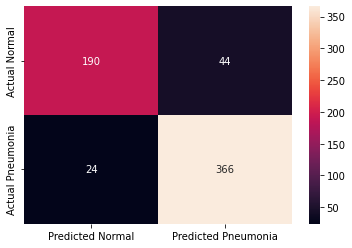

In [66]:
y_pred = np.argmax(cnn_prediction, axis=1)
y_test = np.argmax(test_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       234
           1       0.89      0.94      0.92       390

    accuracy                           0.89       624
   macro avg       0.89      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624



In [68]:
cnn_prediction_val = cnn_model.predict(val_image, batch_size=8)

<AxesSubplot:>

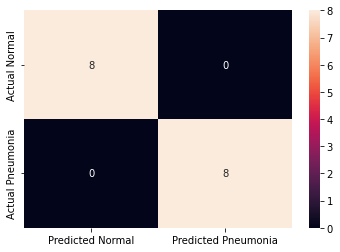

In [69]:
y_pred = np.argmax(cnn_prediction_val, axis=1)
y_test = np.argmax(val_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [43]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16

In [44]:
vgg_base_model = VGG16(input_shape=(150,150,3),weights='imagenet', include_top=False)
vgg_base_model.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [45]:
def freezing_layers(model_name):
    for layer in model_name.layers:
        layer.trainable = False  

In [47]:
#freezing layers
freezing_layers(vgg_base_model) 

In [51]:
vgg_model = Sequential()
vgg_model.add(vgg_base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.5))
vgg_model.add(layers.Dense(2, activation ='sigmoid'))
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              16779264  
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4098      
Total params: 31,506,242
Trainable params: 16,787,458
Non-trainable params: 14,718,784
_________________________________

In [52]:
vgg_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
# Training model
vgg_model.fit(x = train_image, y=train_labels, 
              epochs=50, batch_size=32 , 
              validation_data=(test_image, test_labels), 
              callbacks=callbacks_list
             )

Epoch 1/50
164/164 [==============================] - 6s 25ms/step - loss: 0.2033 - accuracy: 0.9501 - val_loss: 0.3304 - val_accuracy: 0.8878
Epoch 2/50
164/164 [==============================] - 4s 21ms/step - loss: 0.0677 - accuracy: 0.9778 - val_loss: 0.3990 - val_accuracy: 0.8798
Epoch 3/50
164/164 [==============================] - 4s 21ms/step - loss: 0.0426 - accuracy: 0.9853 - val_loss: 0.4512 - val_accuracy: 0.8766
Epoch 4/50
164/164 [==============================] - 4s 21ms/step - loss: 0.0289 - accuracy: 0.9899 - val_loss: 0.2938 - val_accuracy: 0.9183
Epoch 5/50
164/164 [==============================] - 4s 22ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.4297 - val_accuracy: 0.8750
Epoch 6/50
164/164 [==============================] - 4s 21ms/step - loss: 0.0230 - accuracy: 0.9916 - val_loss: 0.5604 - val_accuracy: 0.8622
Epoch 7/50
164/164 [==============================] - 4s 21ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.4655 - val_accuracy: 0.8878

In [54]:
vgg_model.load_weights('pneumonia_classification_ii.hdf5')
vgg_model.evaluate(x=test_image, y=test_labels, batch_size=8)
vgg_model.evaluate(x=val_image, y=val_labels, batch_size=8)

2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 1.0000


[0.001027213642373681, 1.0]

In [76]:
vgg_prediction = vgg_model.predict(test_image, batch_size=8)

<AxesSubplot:>

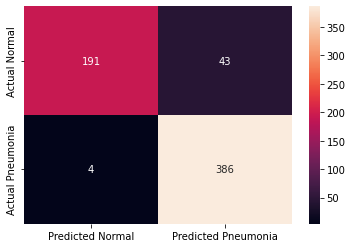

In [77]:
y_pred = np.argmax(vgg_prediction, axis=1)
y_test = np.argmax(test_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       234
           1       0.90      0.99      0.94       390

    accuracy                           0.92       624
   macro avg       0.94      0.90      0.92       624
weighted avg       0.93      0.92      0.92       624



In [79]:
vgg_prediction_val = vgg_model.predict(val_image, batch_size=8)

<AxesSubplot:>

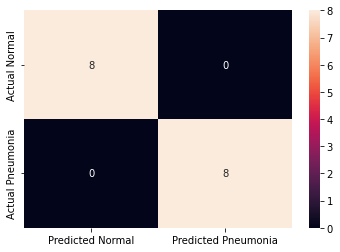

In [80]:
y_pred = np.argmax(vgg_prediction_val, axis=1)
y_test = np.argmax(val_labels, axis=1)
cm = pd.DataFrame(data=confusion_matrix(y_test, y_pred),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [74]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [75]:
resnet_base_model = ResNet50(input_shape=(150,150,3),weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 8s 0us/step
